In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

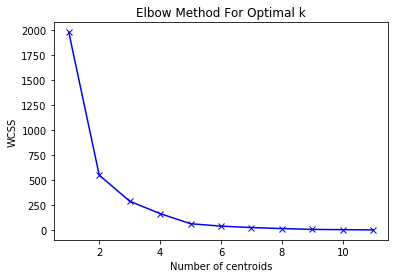

,h,w,Cluster
0,180,75,1
1,174,71,1
2,184,83,1
3,168,63,0
4,178,70,1
5,170,59,0
6,164,53,0
7,155,46,0
8,162,52,0
9,166,55,0


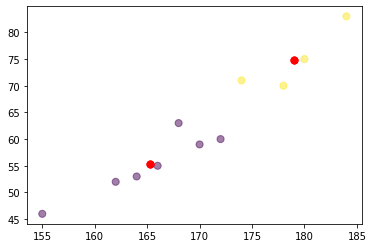

In [44]:
# 1 example 

df=pd.read_csv(r'persons_by_height_weight.csv', names=['h','w'])

wcss = []
K = range(1,12)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

kmeans = KMeans(n_clusters=2, random_state=0).fit(df)
y_kmeans = kmeans.predict(df)
#print(y_kmeans) clusters

#plotting the results 
plt.scatter(df['h'], df['w'], c=y_kmeans, s=50, alpha=0.5,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)

labels = kmeans.labels_
df['Cluster'] = labels
#df['Cluster'].drop_duplicates()
df

,old,income,owner
0,23,50000,no
1,37,34000,no
2,48,40000,yes
3,52,30000,no
4,28,95000,yes
5,25,78000,no
6,35,130000,yes
7,32,105000,yes
8,20,100000,no
9,40,60000,yes


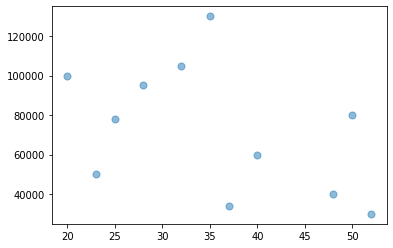

In [93]:
# example 2

df2=pd.read_csv(r'house_owner.txt')

# get dummies value
#pd.get_dummies(df2, prefix='owner') 

# get value form string column
#df2['owner2'] = df2['owner'].apply(lambda x: 1 if x == 'yes' else 0) 

#drop na 
#df3 = df2.dropna()
plt.scatter(df2['old'], df2['income'], s=50, alpha=0.5,cmap='viridis')
df2


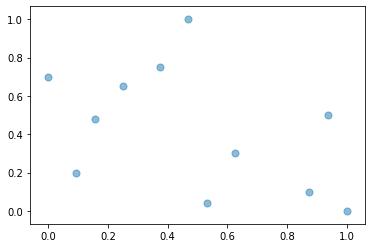

In [102]:
scaler = MinMaxScaler()
arr = scaler.fit_transform(df2[['old','income']])

plt.scatter(arr[:,0], arr[:,1], s=50, alpha=0.5,cmap='viridis')

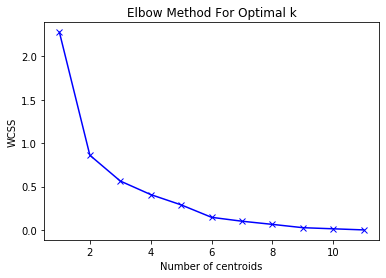

In [104]:
wcss = []
K = range(1,12)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(arr)
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

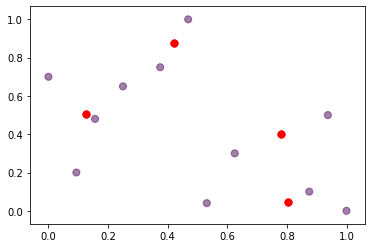

In [118]:
kmeans2 = KMeans(n_clusters=4, random_state=0).fit(arr)
y_kmeans2 = kmeans.predict(arr)


#plotting the results 
plt.scatter(arr[:,0], arr[:,1], s=50, c=y_kmeans2, alpha=0.5,cmap='viridis')
centers2 = kmeans2.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1], c='red', s=50)
plt.scatter(centers2[:, 0], centers2[:, 1], c='red', s=50)

In [115]:
labels2 = kmeans2.labels_
df2['Cluster'] = labels2
#df['Cluster'].drop_duplicates()
df2

,old,income,owner,Cluster
0,23,50000,no,1
1,37,34000,no,0
2,48,40000,yes,0
3,52,30000,no,0
4,28,95000,yes,1
5,25,78000,no,1
6,35,130000,yes,3
7,32,105000,yes,3
8,20,100000,no,1
9,40,60000,yes,2
